# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [59]:
#Import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import numpy as np
from statsmodels.stats.weightstats import ztest

In [60]:
#Set seaborn environment
sns.set()

In [61]:
#Import dataset
df = pd.read_csv('data/human_body_temperature.csv')

In [62]:
# Visualize file
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [63]:
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [64]:
#Check for null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [65]:
#Summary statistics
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [66]:
#Random Number Seed
np.random.seed(42)

## Is the distribution of body temperatures normal?

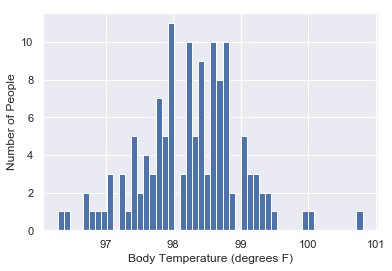

In [67]:
#Histogram
_ = plt.hist(df.temperature,bins=50)
_ = plt.xlabel('Body Temperature (degrees F)')
_ = plt.ylabel('Number of People')

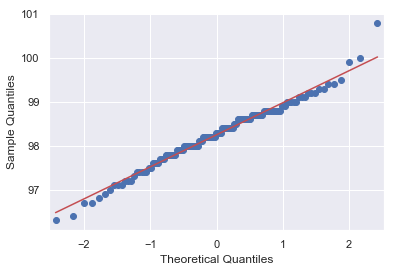

In [68]:
#QQ Plot
_ = qqplot(df.temperature,line='s')

#### Graphically, the data looks like it is close to a normal distribution.

In [69]:
#Shapiro-Wilk Test
stat, p = stats.shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


In [70]:
#D’Agostino’s K^2 Test
stat, p = stats.normaltest(df.temperature)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Test Statistic=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


#### Based on the Shapiro-Wilk and D’Agostino’s K^2 tests of normality, the sample distribution is normal.

## Is the sample size large? Are the observations independent?

According to the central limit theorem, if sample size is greater than or equal to 30, the distribution will be approximately normal. Our sample size is 130 so the sample size can be considered large enough.

The sample size must not be bigger than 10% of the entire population to assume independence. In this case, our population is the world human population, which is 7.5 billion people. Therefore, the 10% rule is satisfied and the observations can be considered independent.

## Is the true population mean really 98.6 degrees F?

### Bootstrap hypothesis test

#### State null hypothesis

In [71]:
## Ho: Mean = 98.6 degrees F
## Ha: Mean <> 98.6 degrees F

#Set significance level to be 0.05 (i.e. alpha = 0.05)

#### Define mean as the test statistic.

In [72]:
#Mean is the test statistic. Calculate observed sample mean.
sample_mean = df.temperature.mean()
sample_mean

98.24923076923078

In [73]:
#Calculate difference between observed sample mean and assumed population mean
98.6 - sample_mean

0.35076923076921673

#### Perform simulations under conditions in which we know the null hypothesis is true (Mean = 98.6)

In [74]:
#Shift sample data to have mean equal to 98.6 (as assumed by null hypothesis)
new_temp = df.temperature - df.temperature.mean() + 98.6
new_temp.mean()

98.59999999999992

In [75]:
#Define function to generate bootstrap replicates
def replicate_func(data,func):
    
    #Generate bootstrap sample
    bs_sample = np.random.choice(data,size=len(data))
    
    #Return replicate from sample
    return func(bs_sample)

In [76]:
#Define function to generate several bootstrap replicates
def draw_bs_replicates(data,func,size=1):
    
    #Initialize empty array to story bootstrap replicates
    bs_replicates = np.empty(size)
    
    #Generate multiple replicates
    for i in range(size):
        
        #Calculate replicate and store in array
        bs_replicates[i] = replicate_func(data,func)
        
    #return array of bootstrap replicates    
    return bs_replicates

In [77]:
#Generate 10000 sets of simulated data and compute mean for each set
bs_means = draw_bs_replicates(new_temp,np.mean,1000)

In [78]:
#Difference between observed mean and assumed population mean
98.6 - sample_mean

0.35076923076921673

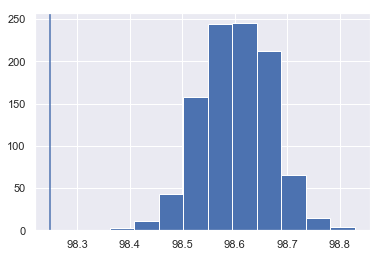

In [79]:
#Visualize distribution of replicates
_ = plt.hist(bs_means)
_ = plt.axvline(sample_mean)

In [80]:
#Calculate p-value to be the probability of getting something more extreme than what we observed. 98.249 is
#0.350769 units away from the null hypothesis. So our p-value is the probability of being more than 0.35 units 
#away from 98.6. This is P(Mean < 98.249) + P(Mean > 98.6+0.350769).
p = ((bs_means <= (sample_mean)).sum() + (bs_means >= (98.6+0.350769)).sum())/len(bs_means)
print('p:',p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p: 0.0
Reject null hypothesis


#### Since p-value is less than our significance level of 0.05, reject null hypothesis and accept alternative hypothesis. The true population mean is therefore NOT 98.6 degrees F. 

### Frequentist statistical testing

#### I will use a one-sample test since I am comparing the mean of one sample to a known population mean of 98.6 degrees F. I will be using the t-test since the population variance is unknown and the t distribution converges to normal for large samples (n > 30), due to the central limit theorem.

In [81]:
#Ho: Mean = 98.6
#Ha: Mean <> 98.6
#Significance level (alpha) = 0.05

In [82]:
#One-sample t-test
stat, p = stats.ttest_1samp(df.temperature, 98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-5.455, p=0.000
Reject null hypothesis


#### Like the bootstrapping approach, the p-value is less than the significance level of 0.05, so we reject the null hypothesis and accept the alternative hypothesis. The true population mean is therefore NOT 98.6 degrees F. 

In [83]:
#one sample z-test
stat, p = ztest(x1=df.temperature, x2=None, value=98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-5.455, p=0.000
Reject null hypothesis


#### The z-test yields the same test-statistic and p-value as the t-test and bootstrapping. This is because the central limit theorem states that for samples larger than 30, the distribution will be normal (which is an assumption for the z-test). 

## Draw a small sample of size 10 from the data and repeat both frequentist tests

In [84]:
#Draw sample of size 10
small_sample = np.random.choice(df.temperature,size=10)

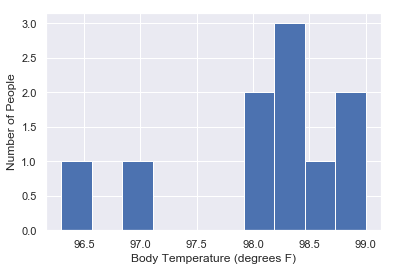

In [85]:
#Histogram of small sample
_ = plt.hist(small_sample)
_ = plt.xlabel('Body Temperature (degrees F)')
_ = plt.ylabel('Number of People')

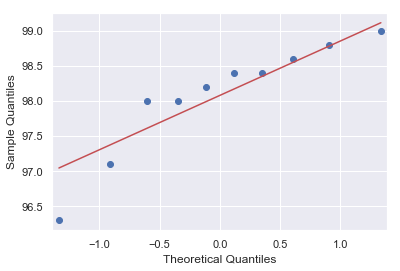

In [86]:
#Is the sample normally distributed?
_ = qqplot(small_sample,line='s')

#### Graphically, it is clear that the sample is not normally distributed.

In [87]:
#Ho: Mean = 98.6
#Ha: Mean <> 98.6
#Significance level (alpha) = 0.05

In [88]:
#One-sample t-test
stat, p = stats.ttest_1samp(small_sample, 98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-2.015, p=0.075
Fail to reject null hypothesis


In [89]:
#One sample z-test
stat, p = ztest(x1=small_sample, x2=None, value=98.6)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-2.015, p=0.044
Reject null hypothesis


#### For small samples (n<30), the t-test should typically be used since the sampling distribution might not follow the normal distrubution. For n=10, the t-test fails to reject the null hypothesis while the z-test does reject the null hypothesis.

## At what temperature should we consider someone's temperature to be "abnormal"?

### 95% Confidence Intervals using Bootstrapping

In [90]:
#Generate 10,000 bootstrap replicates
bs_means = draw_bs_replicates(df.temperature,np.mean,10000)

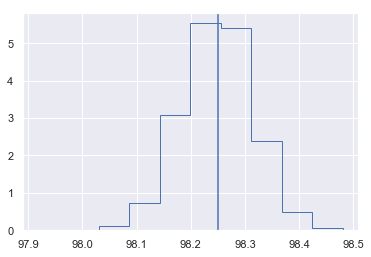

In [91]:
#Plot PDF for replicates
_ = plt.hist(bs_means,density=True,histtype='step')
_ = plt.axvline(np.mean(bs_means))

In [92]:
#95% confidence interval
np.percentile(bs_means,[2.5,97.5])

array([98.12384615, 98.37538462])

#### According to the bootstrap approach, if their temperature is below 98.12 degrees F or higher than 98.38 degrees F, it can be considered abnormal.

### 95% Confidence Intervals using t-test

In [93]:
confidence = 0.95
n = len(df.temperature)
t_critical = stats.t.ppf(q = (1+confidence)/2, df=n-1)
margin_of_error = t_critical * (df.temperature.std())/np.sqrt(n)

In [94]:
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print('Confidence interval:',confidence_interval)

Confidence interval: (98.12200290560804, 98.37645863285351)


#### The frequentist approach yields very similar results to the bootstrap approach, yielding a 95% confidence interval of 98.12 degrees F and 98.38 degrees F.

## Is there a significant difference between males and females in normal temperature? What testing approach did you use and why? Write a story with your conclusion in the context of the original problem.

In [95]:
#Separate out data for males and females
males = df[df.gender == 'M']
females = df[df.gender == 'F']

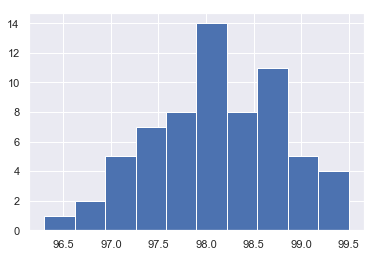

In [96]:
#Visualize data for males
_ = plt.hist(males.temperature)

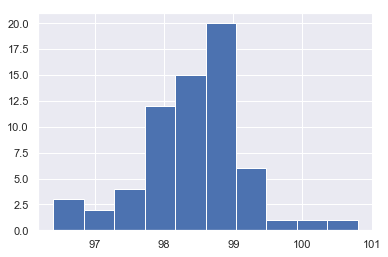

In [97]:
#Visualize data for females
_ = plt.hist(females.temperature)

In [98]:
#Sample sizes for each
print('Males sample size: ' + str(len(males)))
print('Females sample size: ' + str(len(females)))

Males sample size: 65
Females sample size: 65


In [99]:
#Ho = Means temperatures are the same for males and females
#Ha = Mean temperatues are different
#alpha = 0.05

## Frequentist approach

In [100]:
#Two-sample t-test
stat, p = stats.ttest_ind(males.temperature, females.temperature)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-2.285, p=0.024
Reject null hypothesis


In [101]:
#Two-sample z-test
stat, p = ztest(x1=males.temperature, x2=females.temperature, value=0)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Test Statistic=-2.285, p=0.022
Reject null hypothesis


#### Based on the frequentist approach, the p-value is smaller than 0.05 so the null hypothesis is rejected and it can be inferred that there is a statistically significant difference between males and females in normal temperature.

## Bootstrapping approach

In [102]:
#Calculate original difference in mean
sample_diff = males.temperature.mean() - females.temperature.mean()
sample_diff

-0.289230769230727

In [103]:
#Calculate pooled mean (same as sample_mean calculated earlier)
pooled_mean = df.temperature.mean()

# Shift data for males and females assuming null hypothesis (i.e. mean for both males and females = pooled_mean)
male_shifted = males.temperature - males.temperature.mean() + pooled_mean
female_shifted = females.temperature - females.temperature.mean() + pooled_mean

In [104]:
#Check if shifted means are the same (i.e. diff = 0)
print(male_shifted.mean()-female_shifted.mean())

-2.842170943040401e-14


In [105]:
#Define function to calculate difference of means
def bs_diff_of_means(data1,data2,size):
    
    #Create empty array to store bootstrap replicates
    bs_replicates = np.empty(size)
    
    #Loop multiple times
    for i in range(size):
        
        #Generate new bs samples
        bs_data1 = np.random.choice(data1,size=len(data1))
        bs_data2 = np.random.choice(data2,size=len(data2))
        
        #Calculate difference of mean
        bs_replicates[i] = np.mean(bs_data1) - np.mean(bs_data2)
    
    return bs_replicates

In [106]:
#Generate samples for males and females using shifted mean
#Create empty array to store bootstrap replicates
bs_diff_means = bs_diff_of_means(male_shifted,female_shifted,10000)

In [107]:
#Calculate p-value to be the probability of getting something more extreme than what we observed. -0.2892
#is 0 - (-0.2892) = 0.2892 units away from the null hypothesis. So our p-value is the probability of being more 
#than 0.2892 units away from 0. This is P(Diff_of_Means < -0.2892) + P(Diff_of_Means > -0.2892).
p = (abs(bs_diff_means) >= abs(sample_diff)).sum()/len(bs_diff_means)
print('p: ' + str(p))
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p: 0.0227
Reject null hypothesis


#### The p-value from the bootstrapping approach is similar to the values obtained by the frequentist approach. Therefore, the null hypothesis is rejected - the mean temperatures between males and females are, in fact, statistically different.